In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

df_confirmed = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                sep=',',encoding='ISO8859-1')

df_deceased = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                sep=',',encoding='ISO8859-1')


In [116]:
df_confirmed.tail(40)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
213,NaN,Turkey,38.963700,35.243300,0,0,0,0,0,0,...,359,670,1236,1529,1872,2433,3629,5698,7402,9217
214,NaN,Uganda,1.000000,32.000000,0,0,0,0,0,0,...,0,1,1,9,9,14,14,23,30,33
215,NaN,Ukraine,48.379400,31.165600,0,0,0,0,0,0,...,29,47,73,73,97,145,196,310,356,475
216,NaN,United Arab Emirates,24.000000,54.000000,0,0,0,0,0,0,...,140,153,153,198,248,333,333,405,468,570
217,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,2,2,6,6,6,7,15,17,17,22
218,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,3,3,3,5,6,8,8,8,8,8
219,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,14,32,32,36,36,46,66,88,97,108
220,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,10,10,15,15,15,26,35,55,56,65
221,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,1,1,5,13,23,23,25,29,32,42
222,Montserrat,United Kingdom,16.742500,-62.187400,0,0,0,0,0,0,...,1,1,1,1,1,1,5,5,5,5


In [117]:
countries = df_confirmed['Country/Region'].unique()
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',


In [118]:

all_countries = pd.DataFrame()

for c in countries:
    temp = df_confirmed[df_confirmed['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries = pd.concat([all_countries,temp],axis=1)

def create_country_df(country):
    
    confirmed = all_countries[country]
    confirmed.index = pd.to_datetime(confirmed.index)
    factor = confirmed / confirmed.shift()
    data = pd.concat([confirmed,factor],axis=1)
    data.columns = ['confirmed','factor']
    data.factor.replace(np.inf,np.nan,inplace=True)
    data['inc'] = data['confirmed'] - data['confirmed'].shift()
    return data

confirmed_dict = dict()

for c in countries:
    confirmed_dict[c] = create_country_df(c)
    
thai = confirmed_dict['Thailand']
swe = confirmed_dict['Sweden']
ita = confirmed_dict['Italy']
korea = confirmed_dict['Korea, South']
us = confirmed_dict['US']
spain = confirmed_dict['Spain']
ger = confirmed_dict['Germany']

us


,confirmed,factor,inc
2020-01-24,2,NaN,NaN
2020-01-25,2,1.000000,0.0
2020-01-26,5,2.500000,3.0
2020-01-27,5,1.000000,0.0
2020-01-28,5,1.000000,0.0
...,...,...,...
2020-03-25,65778,1.224004,12038.0
2020-03-26,83836,1.274529,18058.0
2020-03-27,101657,1.212570,17821.0
2020-03-28,121478,1.194979,19821.0


In [119]:
global_confirmed = df_confirmed.iloc[:,5:].sum()


In [120]:
global_deceased = df_deceased.iloc[:,5:].sum()
global_deceased.index = pd.to_datetime(global_deceased.index)
global_confirmed = df_confirmed.iloc[:,5:].sum()
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_data = pd.DataFrame(global_confirmed,columns=['confirmed'])
global_data['factor'] = global_data['confirmed'] / global_data['confirmed'].shift()
global_data['inc'] = global_data['confirmed'] - global_data['confirmed'].shift()
global_data['dead'] = global_deceased
global_data['dead_factor'] = global_data['dead'] / global_data['dead'].shift()
global_data['dead_inc'] = global_data['dead'] - global_data['dead'].shift()
global_data['pct_dead'] = 100 * global_data['dead'] /global_data['confirmed']
global_data.index = pd.to_datetime(global_data.index)
global_data.to_pickle('global_data.pkl')
global_data
global_data.describe()

,confirmed,factor,inc,dead,dead_factor,dead_inc,pct_dead
count,67.000000,66.000000,66.000000,67.000000,66.000000,66.000000,67.000000
mean,133790.567164,1.120620,10900.954545,5287.925373,1.127463,513.742424,3.173842
std,160696.344812,0.154839,17328.303431,7554.204513,0.129708,880.037347,0.798563
min,654.000000,1.004913,287.000000,18.000000,1.001780,2.000000,2.040890
25%,38635.000000,1.027576,1784.250000,856.000000,1.037320,64.500000,2.442873
50%,80406.000000,1.080490,2747.500000,2708.000000,1.106621,103.500000,3.361456
75%,136778.500000,1.122335,11238.750000,5062.000000,1.136593,399.500000,3.699511
max,720117.000000,1.905706,67415.000000,33925.000000,1.615385,3454.000000,4.711040


/usr/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


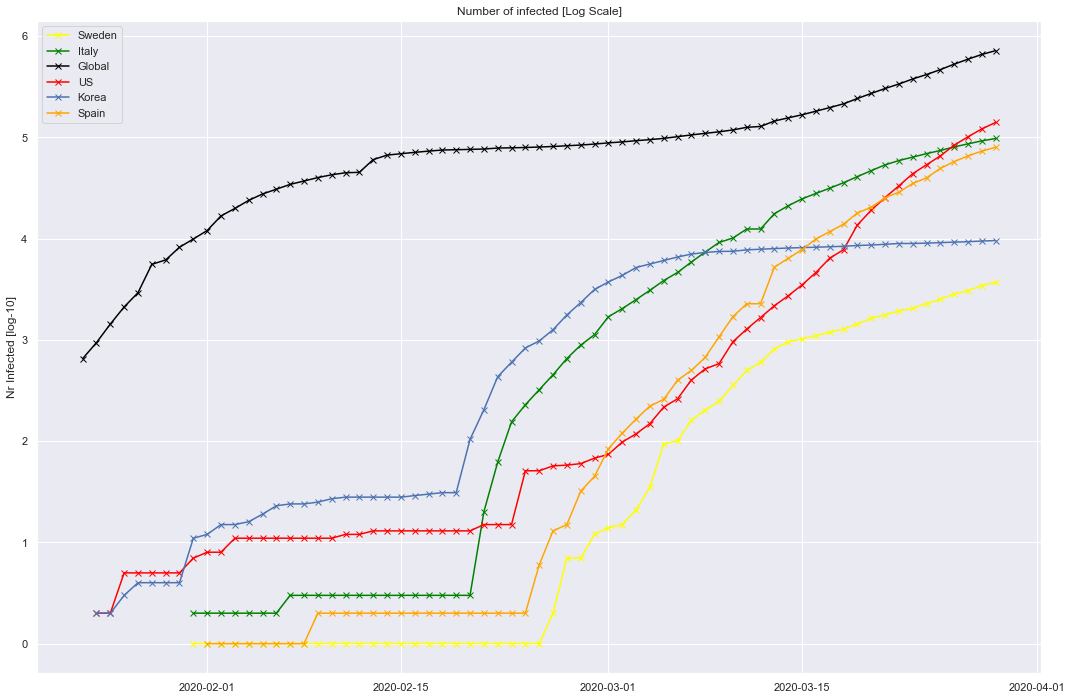

In [121]:
global_conf = np.log10(global_confirmed)

swe_conf = swe.loc[swe['confirmed'] > 0]
swe_conf = np.log10(swe_conf['confirmed'])
ita_conf = ita.loc[ita['confirmed'] > 0]
ita_conf = np.log10(ita_conf['confirmed'])
us_conf = us.loc[us['confirmed'] > 0]
us_conf = np.log10(us_conf['confirmed'])
korea_conf = korea.loc[korea['confirmed'] > 0]
korea_conf = np.log10(korea_conf['confirmed'])
spain_conf = spain.loc[spain['confirmed'] > 0]
spain_conf = np.log10(spain['confirmed'])

plt.figure(figsize=(18,12))
plt.title('Number of infected [Log Scale]')
plt.plot(swe_conf,'x-',color='yellow',label='Sweden')
plt.plot(ita_conf,'x-',color='green',label='Italy')
plt.plot(global_conf,'x-',color='black',label='Global')
plt.plot(us_conf,'x-',color='red',label='US')
plt.plot(korea_conf,'x-',color='b',label='Korea')
plt.plot(spain_conf,'x-',color='orange',label='Spain')
plt.ylabel('Nr Infected [log-10]')
plt.legend(loc='upper left')
plt.savefig('corona_evolution_countries_log.jpg',format='jpg')

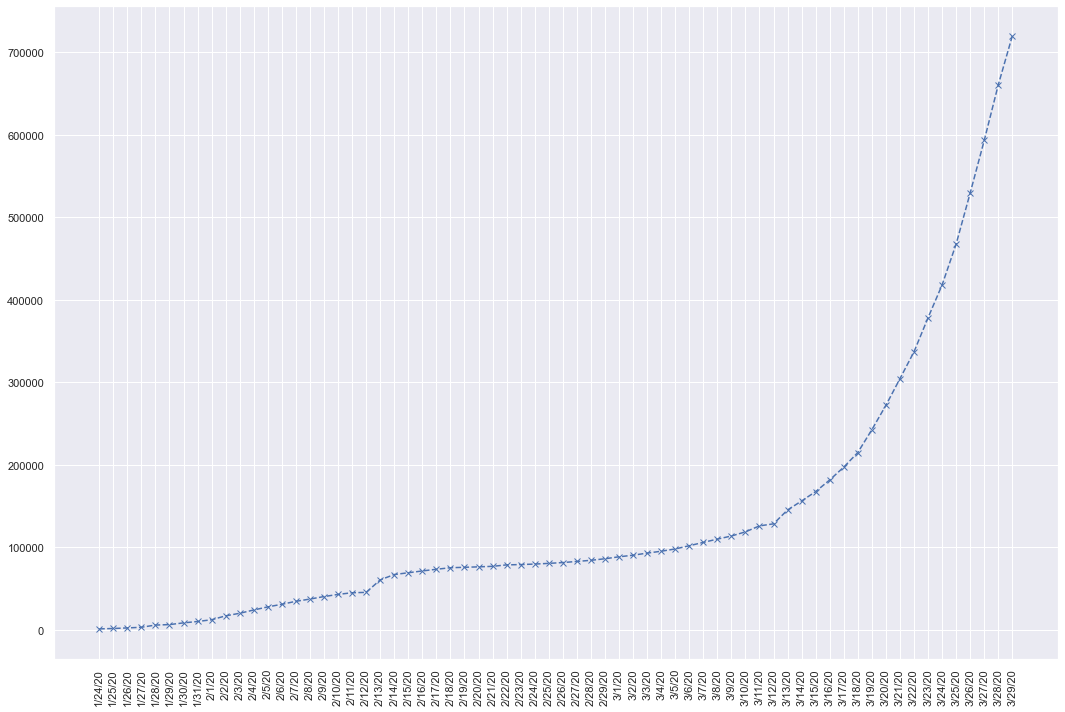

In [122]:
global_series = all_countries.sum(axis=1)
_= plt.figure(figsize=(18,12))
_= plt.plot(global_series,'x--')

_= plt.xticks(rotation=90)



In [123]:


countries_deceased = countries
all_countries_deceased = pd.DataFrame()

for c in countries_deceased:
    temp = df_deceased[df_deceased['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries_deceased = pd.concat([all_countries_deceased,temp],axis=1)
    

def create_deceased_df(country):
    process = True
    try:
        deceased = all_countries_deceased[country]
    except KeyError:
        print ('cant find {} in deaths'.format(country))
        process = False
        
    if process:
        deceased.index = pd.to_datetime(deceased.index)
        factor = deceased / deceased.shift()

        data = pd.concat([deceased,factor],axis=1)
        data.columns = ['deceased','dead_factor']
        data.dead_factor.replace(np.inf,np.nan,inplace=True)
        data['dead_inc'] = data['deceased'] - data['deceased'].shift()
        return data

deceased_dict = dict()

for c in countries_deceased:
    
    deceased_dict[c] = create_deceased_df(c)




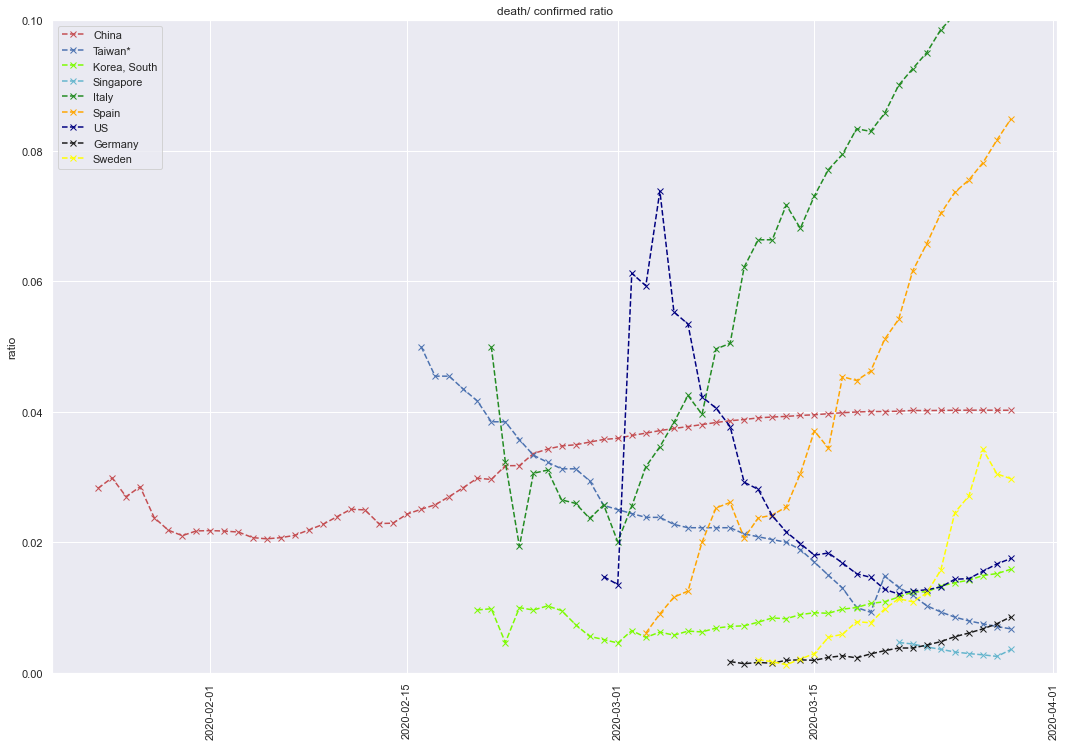

In [124]:
country_data = dict()

for c in countries:
    country_data[c] = pd.concat([confirmed_dict[c],deceased_dict[c]],axis=1)
    country_data[c]['pct_dead'] = 100 * country_data[c]['deceased'] / country_data[c]['confirmed']
    country_data[c]['conf_over_dead'] = country_data[c]['confirmed'] / country_data[c]['deceased']
    country_data[c]['conf_over_dead'] = country_data[c]['conf_over_dead'].replace(np.inf,np.nan)
    country_data[c]['dead_conf_ratio'] =  country_data[c]['dead_factor'] / country_data[c]['factor']
    

import pickle

with open ('country_data.pkl','wb') as f:
    pickle.dump(country_data,f,protocol=pickle.HIGHEST_PROTOCOL)

countries_of_interest = ['China','Taiwan*','Korea, South','Singapore',
                         'Italy','Spain','US','Germany','Sweden']

colors = ['r','b','lawngreen','c',
          'forestgreen','orange','navy','k','yellow']

plt.figure(figsize=(18,12))
plt.title('death/ confirmed ratio')

i = 0
for c in countries_of_interest:
    country = country_data[c]
    mask = country['deceased'] >= 1
    country = country[mask]
    plt.plot(country['deceased'] / country['confirmed'],'x--',
             color=colors[i],label=c)
    i += 1      

plt.ylabel('ratio')
plt.xticks(rotation=90)
plt.ylim([0,0.10])
plt.legend(loc='upper left')
#plt.yscale('log')

plt.savefig('corona_dead_conf_ratio.jpg',format='jpg')


In [125]:
country_data['Sweden'].tail(40)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-02-19,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-20,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-21,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-22,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-23,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-24,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-25,1,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-26,2,2.000000,1.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-27,7,3.500000,5.0,0,NaN,0.0,0.000000,NaN,NaN
2020-02-28,7,1.000000,0.0,0,NaN,0.0,0.000000,NaN,NaN


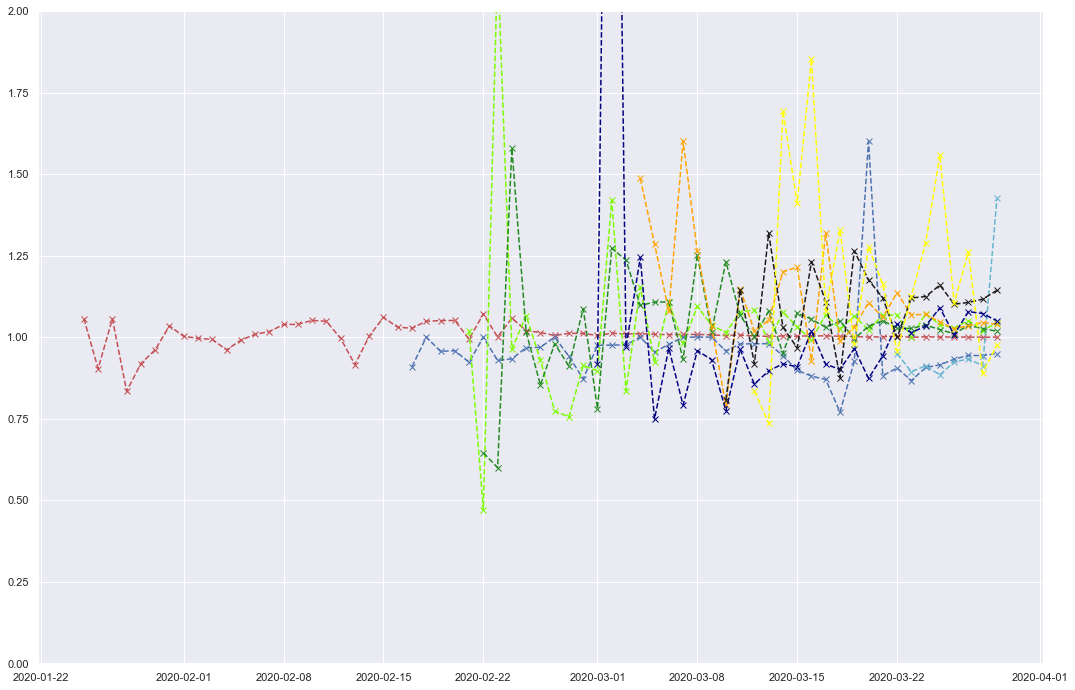

In [126]:
plt.figure(figsize=(18,12))
plt.ylim([0,2])
i = 0
for c in countries_of_interest:
    country = country_data[c]
    mask = country['deceased'] >= 1
    country = country[mask]
    plt.plot(country['dead_conf_ratio'],'x--',
             color=colors[i],label=c)
    i += 1 